In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('/content/train_loan_ensemble.csv')

In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
# Checking Missing Values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **Treating Missing Values**

In [38]:
# Mode Calculation for Gender, Married, Self_Employed, Credit_History
print("Gender Column Mode Calculation : " + data['Gender'].mode()[0])
print("Married Column Mode Calculation : " + data['Married'].mode()[0])
print("Self_Employed Column Mode Calculation :" + data['Self_Employed'].mode()[0])

Gender Column Mode Calculation : Male
Married Column Mode Calculation : Yes
Self_Employed Column Mode Calculation :No


In [39]:
# Replace null data with mode value
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [40]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
#Dependents
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [42]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [43]:
# Mode for Dependents
data.Dependents = data.Dependents.fillna('0')

In [44]:
#Removed the + symbol for converting to int data type
data['Dependents'] = data['Dependents'].str.replace("+", "")

In [45]:
# Converting to int data type
data['Dependents'] = data['Dependents'].astype('int')

In [46]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

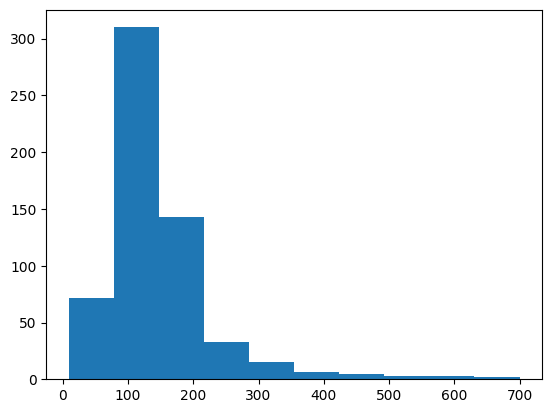

In [47]:
plt.hist(data.LoanAmount)
plt.show()

In [48]:
#median calculation and assigning to LoanAmount
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.median())

In [49]:
#median calculation and assigning to Loan_Amount_Term
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median())

In [51]:
#Completed all the Missing values
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## **Outlier detection**

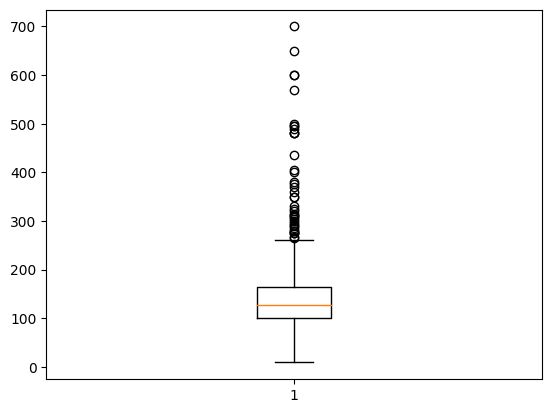

In [55]:
# boxplot Graph for LoanAmount
plt.boxplot(data.LoanAmount)
plt.show()

In [56]:
# Trimming Outlier for LoanAmount
q1 = data['LoanAmount'].quantile(0.25)
q3 = data['LoanAmount'].quantile(0.75)
iqr = q3 -q1
iqr

64.5

In [57]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(upper_limit,lower_limit)

261.5 3.5


In [58]:

# function for trimming the limit

def limit_input(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value



In [60]:
# applied the above function for all rows
data['LoanAmount'] = data['LoanAmount'].apply(limit_input)

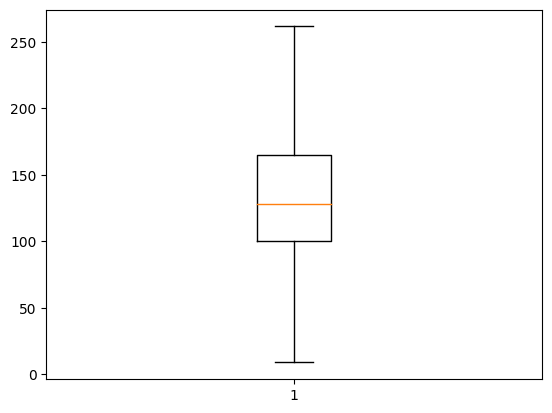

In [62]:
# boxplot Graph for LoanAmount
plt.boxplot(data.LoanAmount)
plt.show()

## **Encoding**

In [63]:
# Education Encoding
educationDist = {'Graduate' : 1 , 'Not Graduate' : 0}
data.Education = data.Education.map(educationDist)

In [64]:
booleanDist = { 'Male' : 1, 'Female': 0}
#Gender
data.Gender = data.Gender.map(booleanDist)

In [66]:
booleanDist = { 'Yes' : 1, 'No': 0}
#Married
data.Married = data.Married.map(booleanDist)

In [67]:
booleanDist = { 'Y' : 1, 'N': 0}
#Loan_Status
data.Loan_Status = data.Loan_Status.map(booleanDist)

In [68]:
booleanDist = { 'Yes' : 1, 'No': 0}
#Self_Employed
data.Self_Employed = data.Self_Employed.map(booleanDist)

In [69]:
# One hot Encoding for Property_Area
data.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [70]:
loan_dataset_encoded = pd.get_dummies(data, columns=['Property_Area'], dtype= int)
loan_dataset_encoded

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,LP002979,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,0,1


## **Scaling**

In [71]:
# No need to implement feature engineering
# Direct MIN MAX Scaling
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [72]:
# Drop Loan_Id column
# Not required for data preprocessing

loan_dataset_encoded = loan_dataset_encoded.drop('Loan_ID', axis = 1)

In [73]:
loan_dataset_encoded.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [78]:
loan_dataset_encoded.loc[: , ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',]] = min_max.fit_transform(loan_dataset_encoded[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']])


In [79]:
loan_dataset_encoded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.000000,1,0,0.070489,0.000000,0.471287,0.74359,1.0,1,0,0,1
1,1,1,0.333333,1,0,0.054830,0.036192,0.471287,0.74359,1.0,0,1,0,0
2,1,1,0.000000,1,1,0.035250,0.000000,0.225743,0.74359,1.0,1,0,0,1
3,1,1,0.000000,0,0,0.030093,0.056592,0.439604,0.74359,1.0,1,0,0,1
4,1,0,0.000000,1,0,0.072356,0.000000,0.522772,0.74359,1.0,1,0,0,1


## **Regression**

In [99]:
x = loan_dataset_encoded.drop(['Loan_Status'],axis = 1)
y = loan_dataset_encoded['Loan_Status']

In [100]:
#Train_Test_Split
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [126]:
# importing all required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import BaggingClassifier

import xgboost as xgb


from sklearn.metrics import accuracy_score

In [128]:
#DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)
y_pred_dt = dt_clf.predict(x_test)
dt_clf_accuracy_score = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy Score = ", dt_clf_accuracy_score)

Decision Tree Classifier Accuracy Score =  0.6910569105691057


In [111]:
#LogisticRegression
reg=LogisticRegression()
reg.fit(x_train, y_train)
y_pred_logistic=reg.predict(x_test)
logistic_accuracy_score = accuracy_score(y_test, y_pred_logistic)
print("DecisionTreeClassifier Accuracy Score = ", logistic_accuracy_score)

DecisionTreeClassifier Accuracy Score =  0.7886178861788617


In [129]:
#Random Forest
rf_reg = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)
rf_accuracy_score = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy Score = ", rf_accuracy_score)

Random Forest Accuracy Score =  0.7723577235772358


In [131]:
# Bagging Classifier
bagging_clf = BaggingClassifier(estimator = dt_clf, n_estimators = 100, random_state = 42) # dt_clf is defined on top
bagging_clf.fit(x_train, y_train)
y_pred_bagging = bagging_clf.predict(x_test)
bagging_accuracy_score = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy Score= ", bagging_accuracy_score)


Bagging Classifier Accuracy Score=  0.7398373983739838


In [132]:
#Adaboost
ada_clf = AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train, y_train)
y_pred_ada = ada_clf.predict(x_test)
ada_accuracy_score = accuracy_score(y_test, y_pred_ada)
print("Adaboost Classifier Accuracy Score= ", ada_accuracy_score)

Adaboost Classifier Accuracy Score=  0.7642276422764228


In [124]:
#GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 100,max_depth = 3, random_state = 42)
gb_clf.fit(x_train,y_train)
y_pred_gb = gb_clf.predict(x_test)
gb_accuracy_score = accuracy_score(y_test,y_pred_gb)
print("Gradient Boosting Classifier Accuracy Score= ", gb_accuracy_score)


Adaboost Classifier Accuracy Score=  0.7642276422764228


In [127]:
#XGB
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(x_train,y_train)
y_pred_xgb = xgb_clf.predict(x_test)
xgb_accuracy_score = accuracy_score(y_test,y_pred_xgb)
print("XGB Boosting Classifier Accuracy Score= ", xgb_accuracy_score)

XGB Boosting Classifier Accuracy Score=  0.7642276422764228


## **Accuracy Plot**

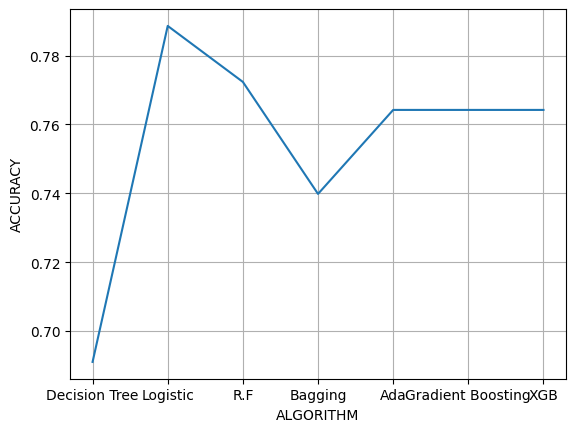

In [138]:
labels = np.array(['Decision Tree', 'Logistic', 'R.F', 'Bagging', 'Ada', 'Gradient Boosting', 'XGB'])
acc_values = np.array([dt_clf_accuracy_score, logistic_accuracy_score, rf_accuracy_score, bagging_accuracy_score, ada_accuracy_score, gb_accuracy_score, xgb_accuracy_score])
plt.plot(labels,acc_values, linestyle = 'solid',label=labels)
plt.xlabel("ALGORITHM")
plt.ylabel('ACCURACY')
plt.grid()